In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import matplotlib.pyplot as plt
import matplotlib

from pylab import plot,show, hist, rcParams 
rcParams['figure.figsize'] = 10, 8

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,f1_score,brier_score_loss, recall_score, precision_score

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline


#plt.rc("font", size=14)

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv('data_breast.csv')

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#Выбрать стратегию для работы с пропущенными значениями - т.к. столбец 32 содержит только нулевые значения - избавимся от него. У других столбцов пропущенных значений нет
data.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
data['diagnosis']=data['diagnosis'].apply(lambda x: 0 if x=='B' else 1  )

In [7]:
#Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
data.describe(include='all')

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean           ...             radius_worst  \
count           569.000000           ...               569.000000   
mean              0.048919           ...                16.269190   
std               0.038803           ...                 4.833242   
min               0.000000           ...                 7.930000   
25%               0.020310           ...                13.010000   
50%               0.033500           ...                14.970000   
75%               0.074000           ...                18.790000   
max               0.201200           ...                36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 32 columns]

In [8]:
#Визуализировать взаимосвязи между переменными.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002381A028F60>,
      dtype=object)

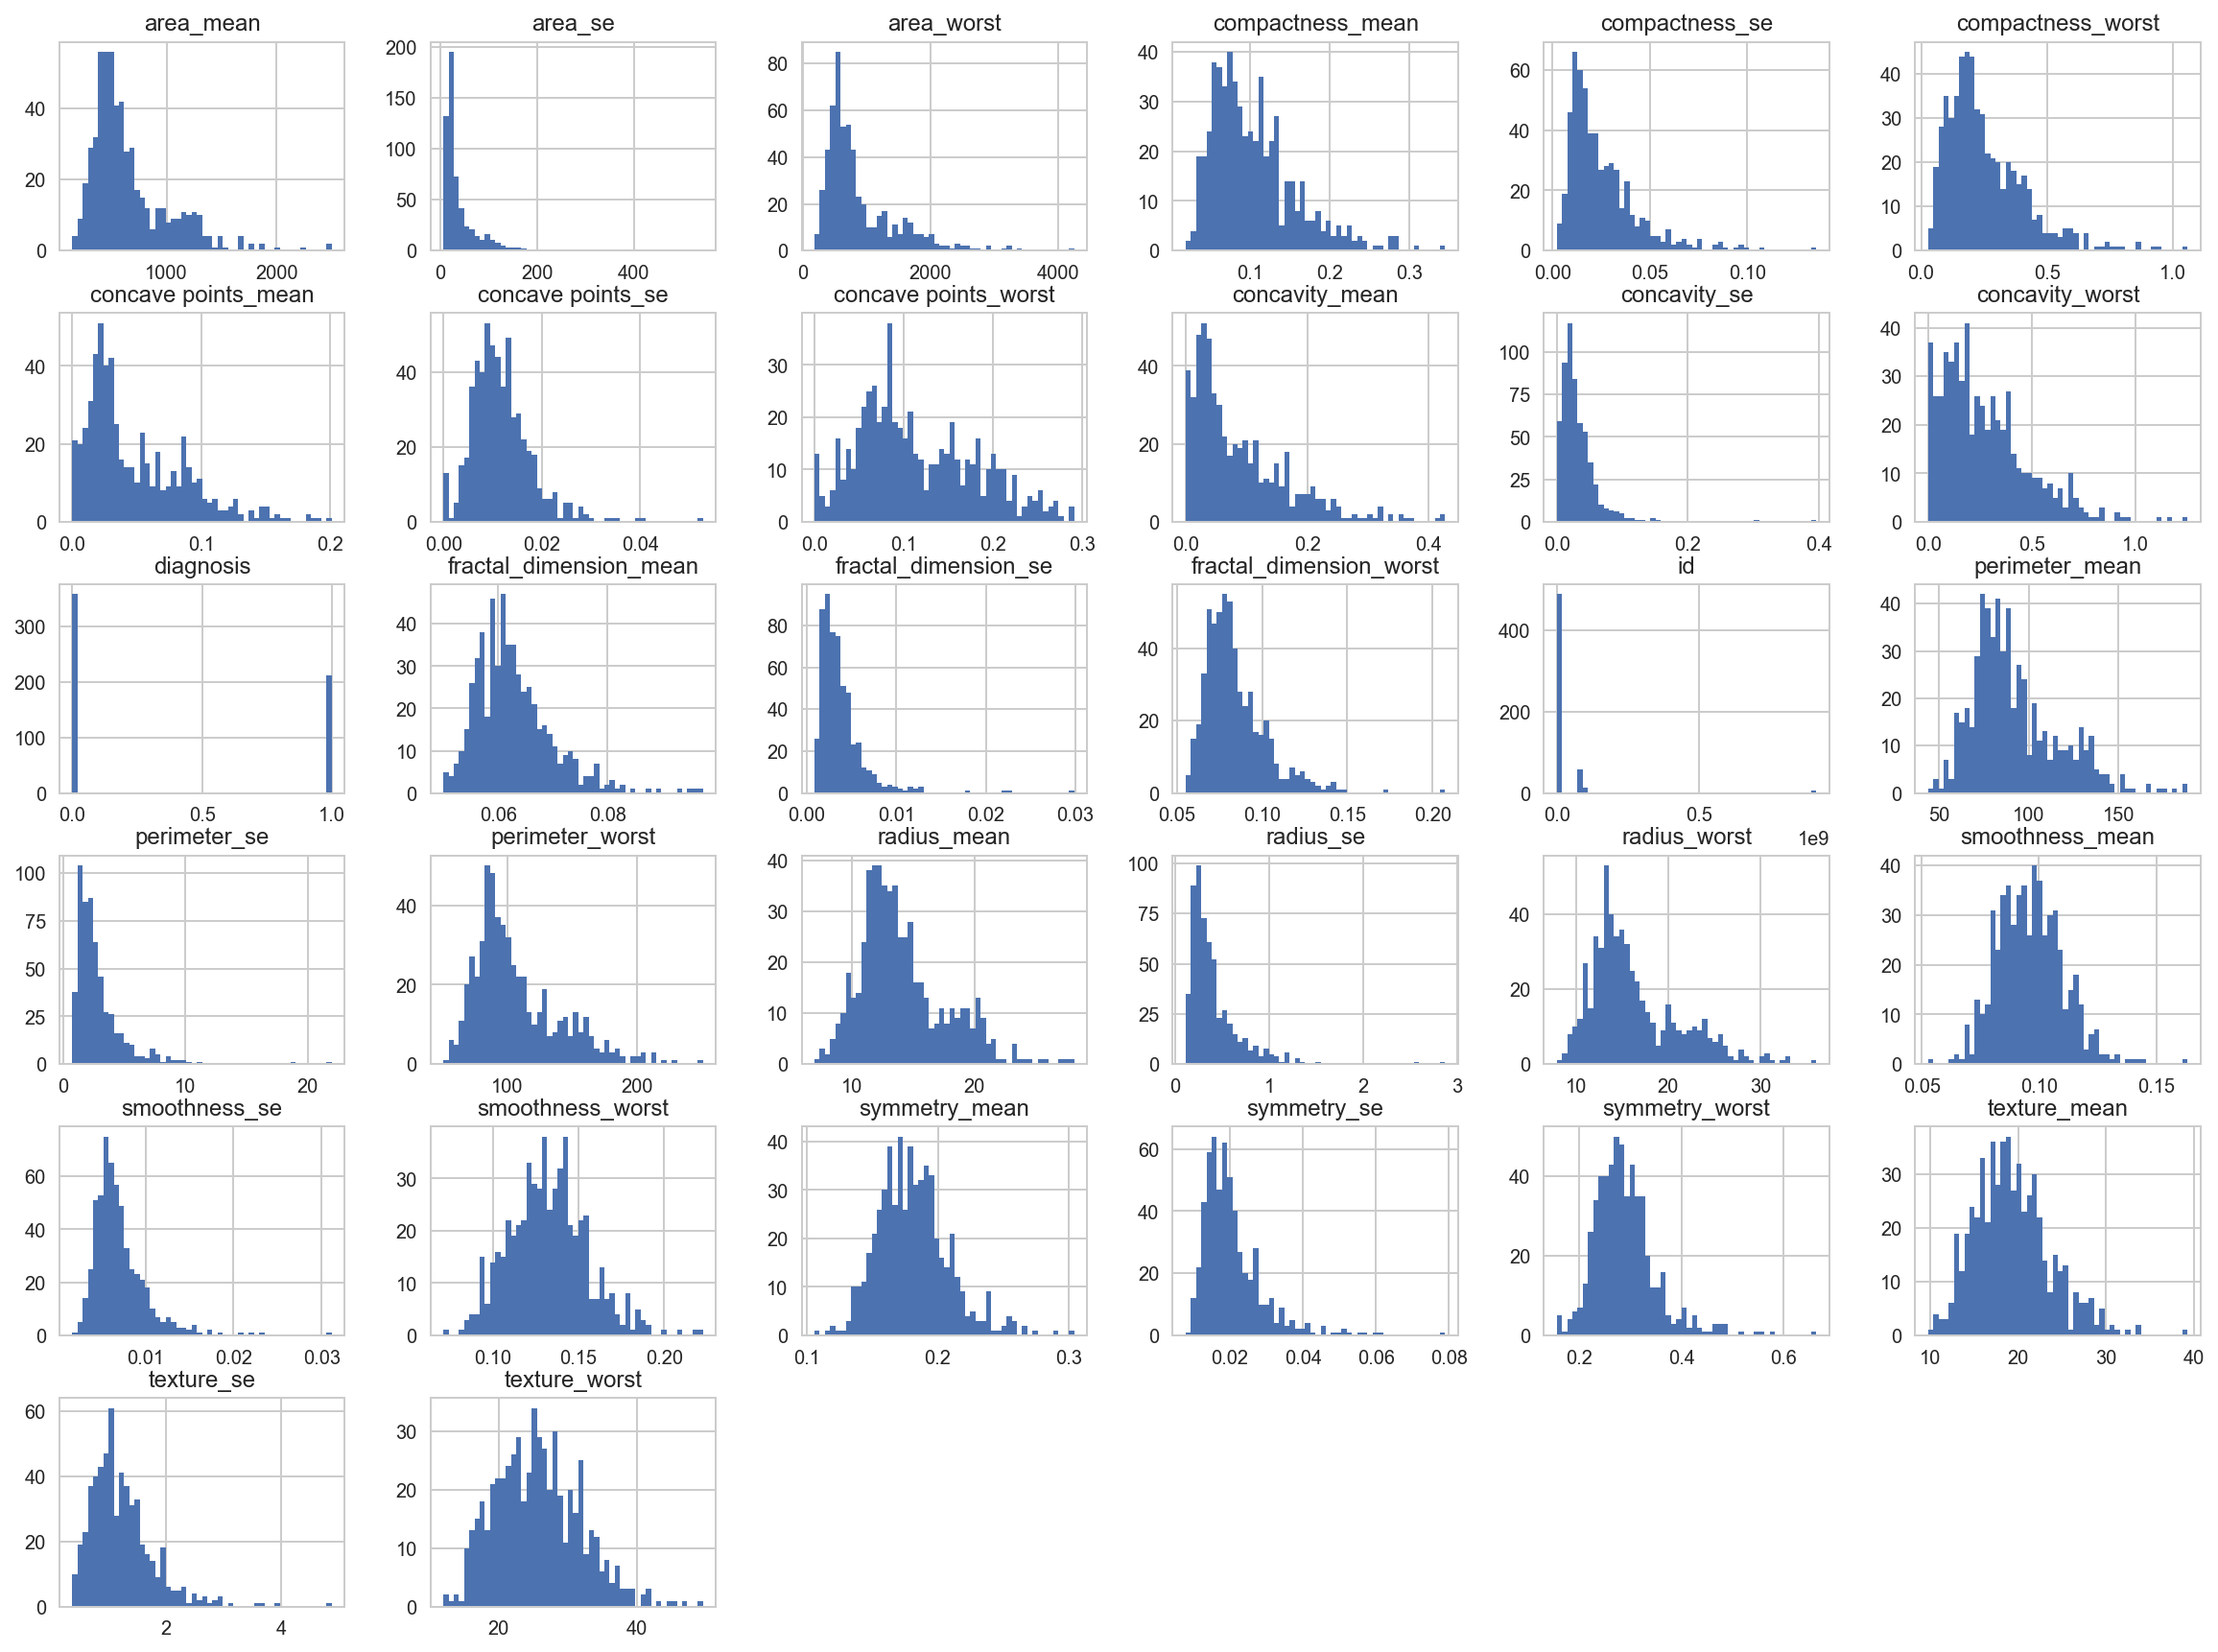

In [9]:
%config InlineBackend.figure_format = 'retina'
data.hist(bins=50, figsize=(20,15), )

In [10]:
#Рассчитать и визуализировать корреляционную матрицу для переменных.

In [11]:
corr_matrix=data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [12]:
corr_matrix

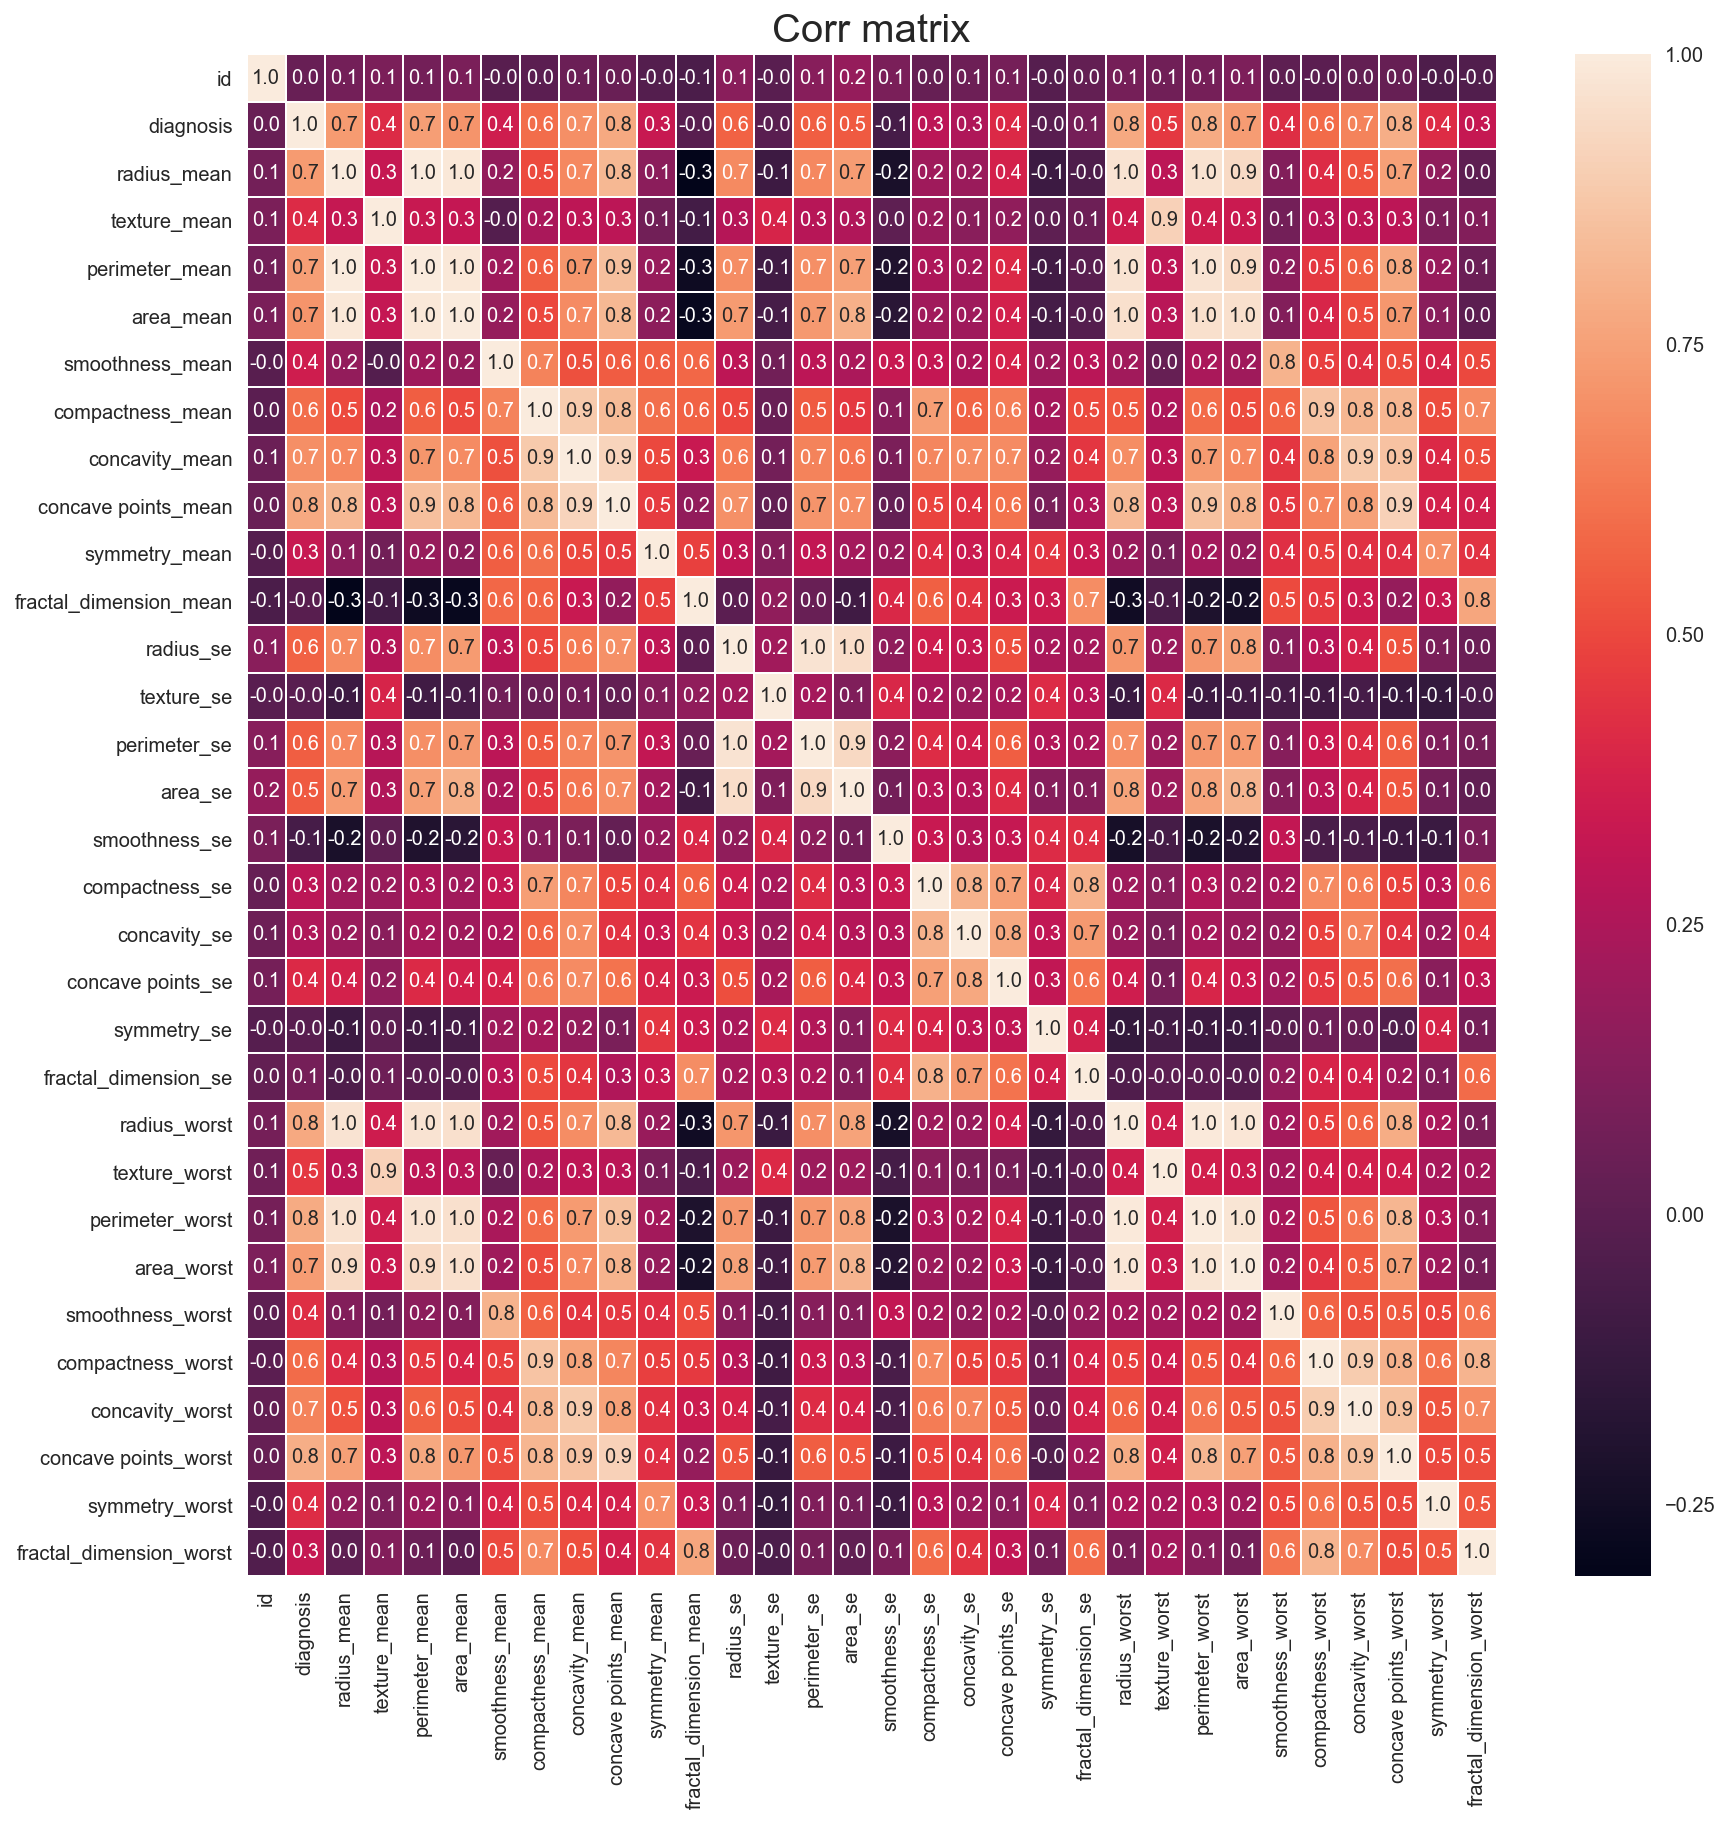

In [13]:
f,ax = plt.subplots(figsize=(14, 14))
plt.title('Corr matrix', size=20)
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [14]:
#Удалим лишние признаки, коррелирующие между собой

In [15]:
drop_list = ['perimeter_mean','radius_mean', 'compactness_worst','concave points_worst','compactness_mean', 'concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','texture_worst','area_worst']
data = data.drop(drop_list,axis = 1 ) 
data.head()

id  diagnosis  texture_mean  area_mean  smoothness_mean  \
0    842302          1         10.38     1001.0          0.11840   
1    842517          1         17.77     1326.0          0.08474   
2  84300903          1         21.25     1203.0          0.10960   
3  84348301          1         20.38      386.1          0.14250   
4  84358402          1         14.34     1297.0          0.10030   

   concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
0          0.3001         0.2419                 0.07871      0.9053   153.40   
1          0.0869         0.1812                 0.05667      0.7339    74.08   
2          0.1974         0.2069                 0.05999      0.7869    94.03   
3          0.2414         0.2597                 0.09744      1.1560    27.23   
4          0.1980         0.1809                 0.05883      0.7813    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

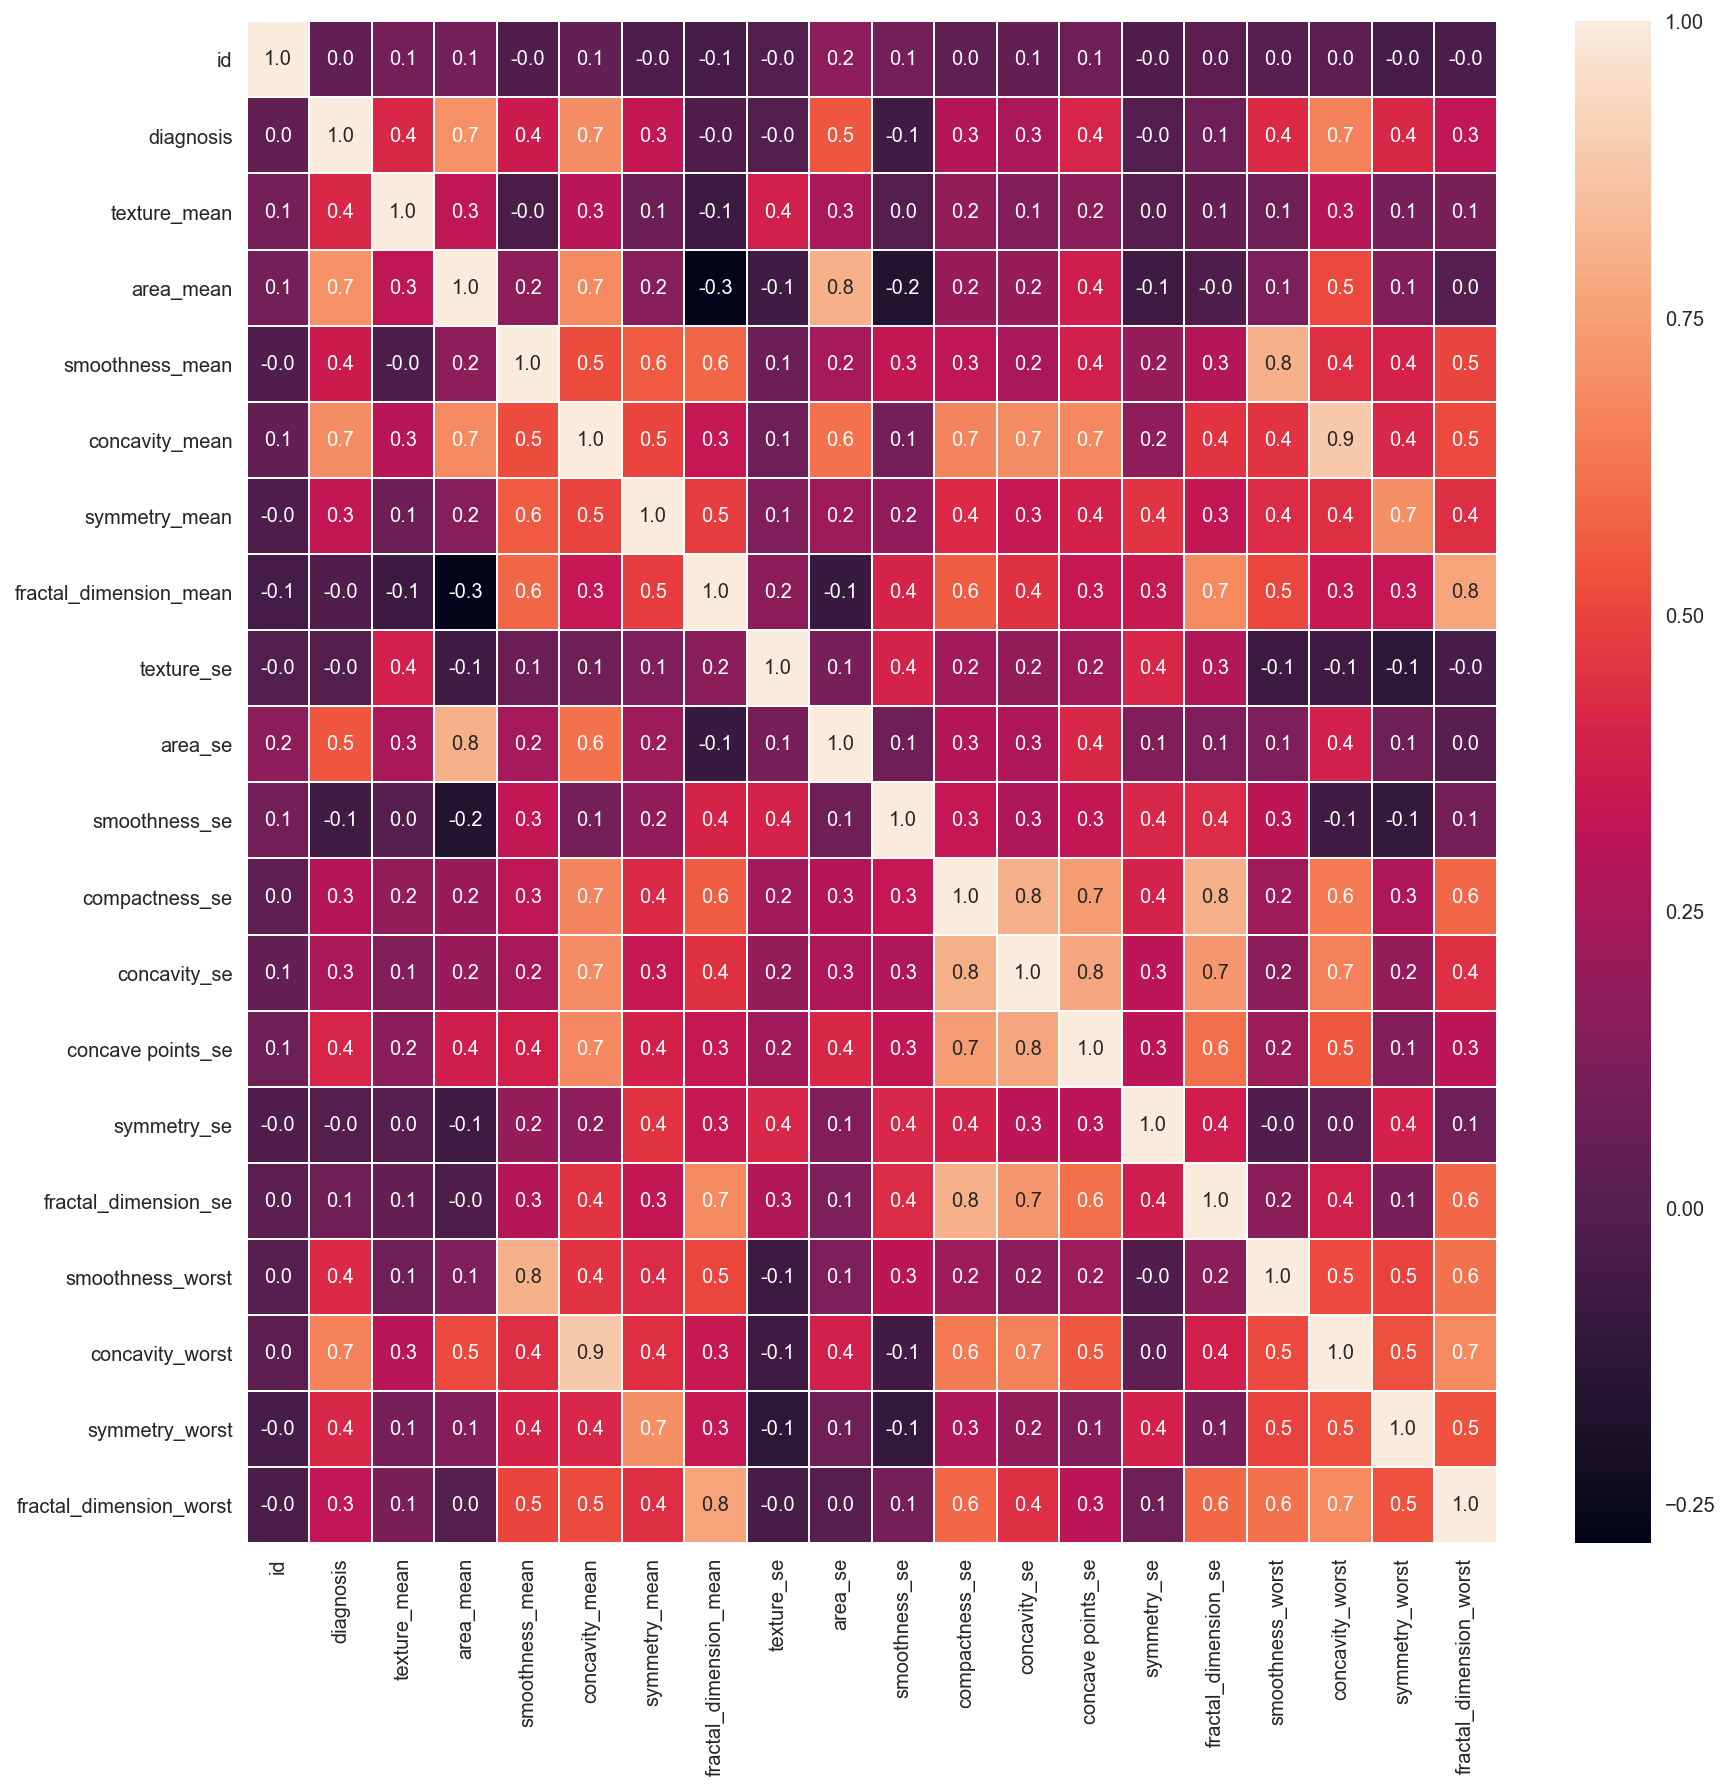

In [16]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
y=data['diagnosis'].copy() #Отделим таргет

X=data.copy() # Отделим объясняемые переменные
X.drop('diagnosis', axis=1, inplace=True) #и удалим из них таргет

all_columns=list(X.columns)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [19]:
y_train.value_counts(normalize=True)

0    0.629921
1    0.370079
Name: diagnosis, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

0    0.62234
1    0.37766
Name: diagnosis, dtype: float64

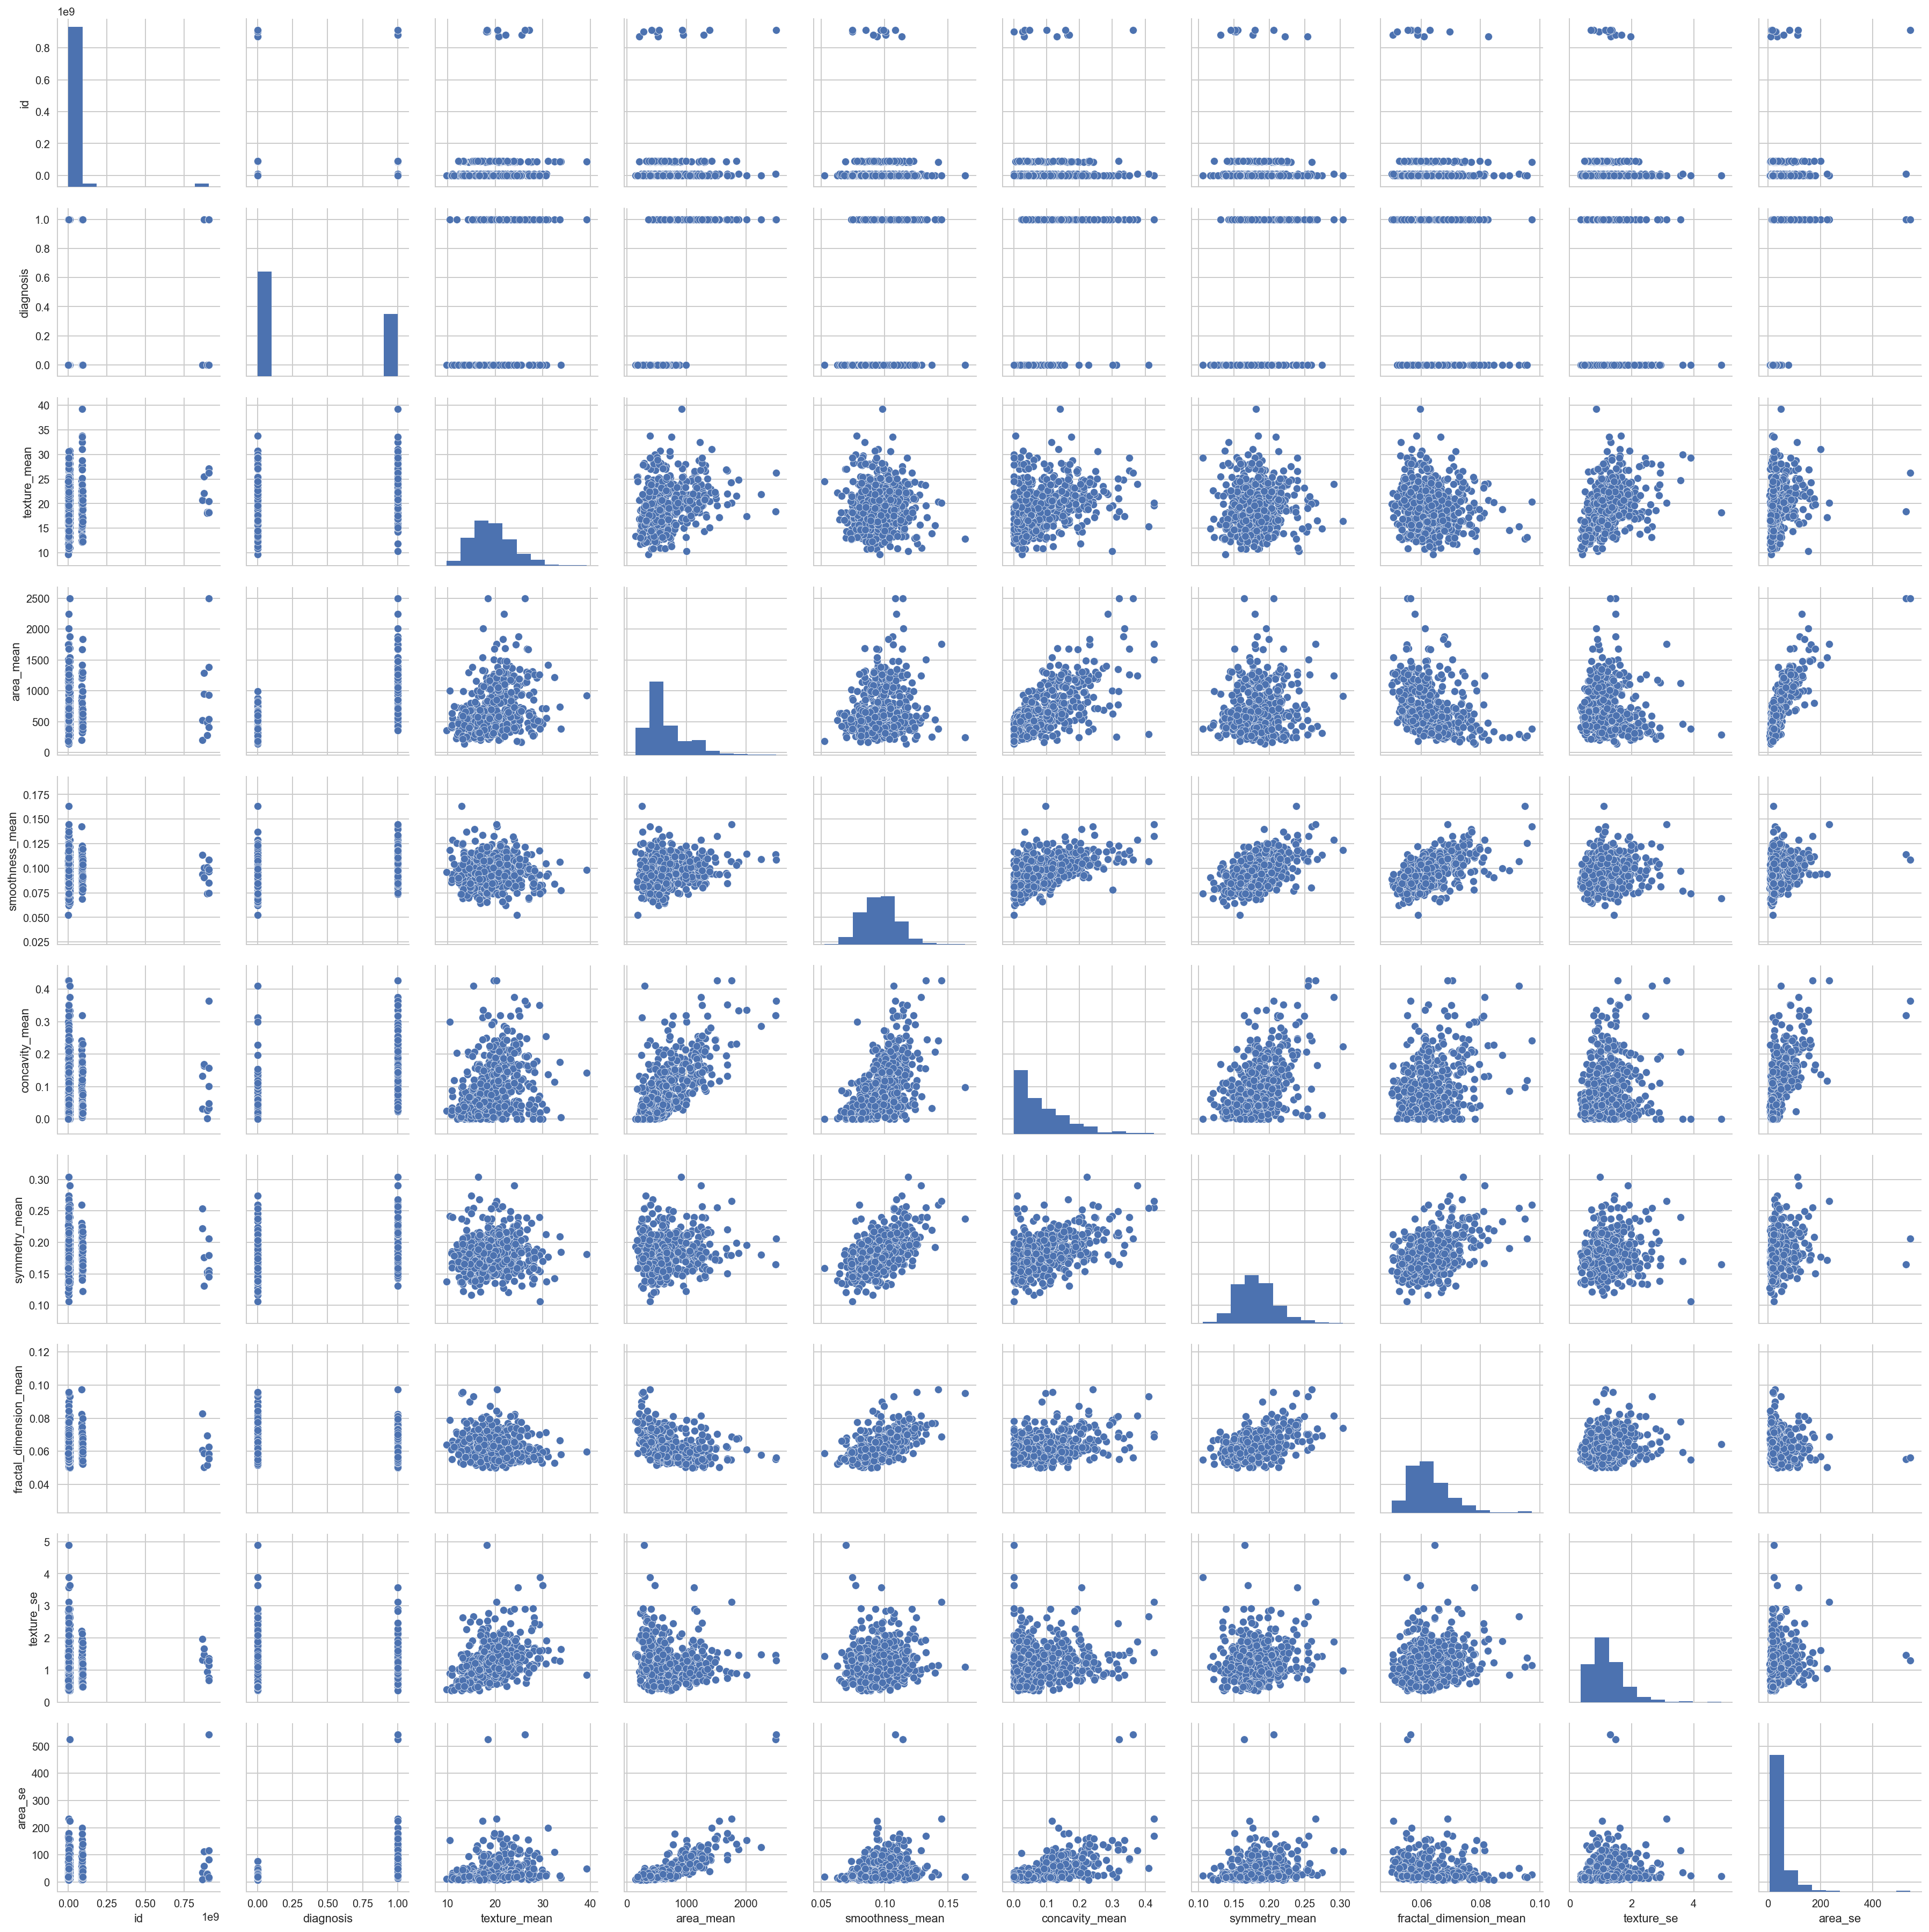

In [21]:
sns_plot = sns.pairplot(data.iloc[:,:10])

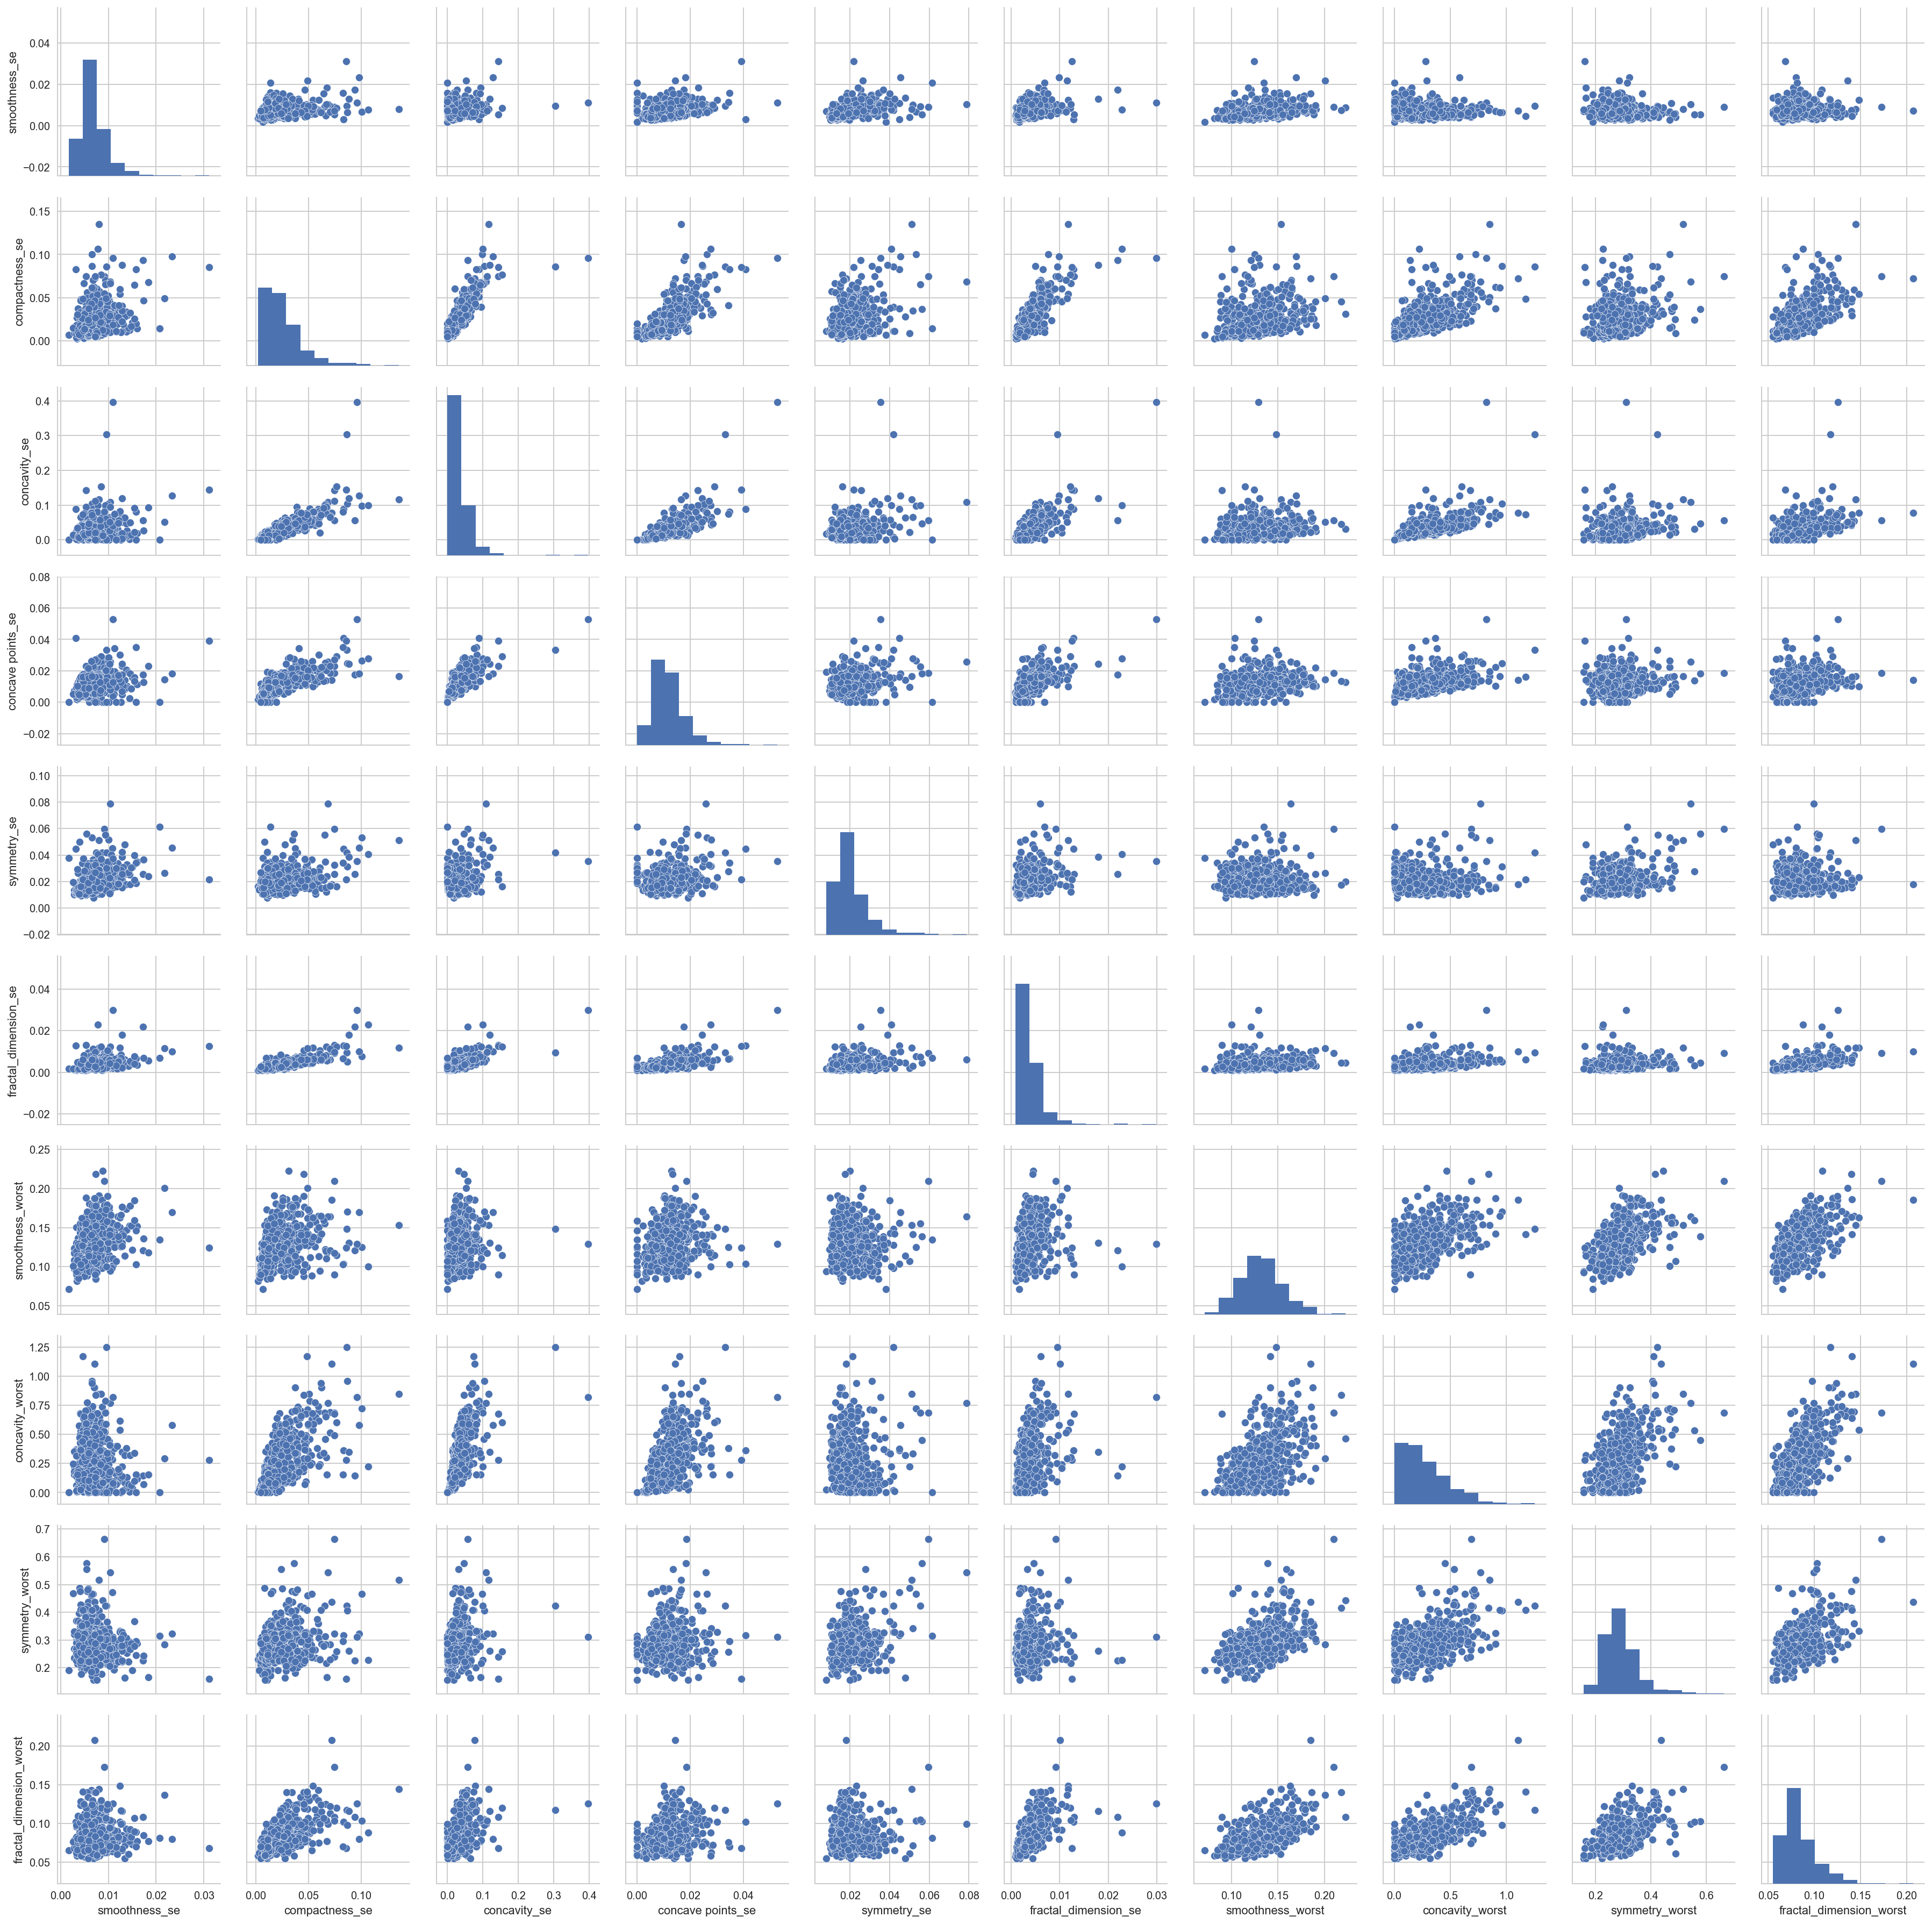

In [22]:
sns_plot = sns.pairplot(data.iloc[:,10:])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

id  texture_mean  area_mean  smoothness_mean  concavity_mean  \
0 -0.239576      0.580118   1.043097        -1.614463        0.278786   
1 -0.239437     -1.206240  -0.556076        -1.343671       -0.936594   
2  0.464254      0.511058   0.434240         0.406404        0.205178   
3 -0.239228      0.354521   1.850358         0.689877        1.483492   
4 -0.239438     -1.979714  -0.704737        -0.699888       -0.906661   

   symmetry_mean  fractal_dimension_mean  texture_se   area_se  smoothness_se  \
0      -0.115397               -1.370803    0.148494  0.850612      -0.486565   
1      -0.468436               -0.893716   -1.075213 -0.551597      -0.545877   
2       1.304041               -0.520075    0.079103  0.093688      -0.693682   
3       1.183934                0.035754   -0.397785  1.115119      -0.788519   
4       0.113897               -0.197385   -1.490517 -0.699415      -0.932518   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0        1.505923      0.855551           0.405383     0.106862   
1       -1.070469     -0.631578          -1.031364    -0.087203   
2       -0.319656     -0.304750          -0.391722    -0.613438   
3        0.042839      0.227837           0.370187    -0.121729   
4       -0.653763     -0.667362          -1.090126    -0.021721   

   fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  \
0              0.529256         -1.919037        -0.080139       -0.848449   
1             -1.074500         -1.390195        -1.083055       -0.975220   
2             -0.516023          0.363710         0.135710        1.004741   
3             -0.391987         -0.201635         0.816318        0.332522   
4             -0.681274         -0.985105        -0.884304        0.854618   

   fractal_dimension_worst  
0                -1.035245  
1                -1.348044  
2                -0.398240  
3                -0.428259  
4                -0.509311

In [24]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

id  texture_mean  area_mean  smoothness_mean  concavity_mean  \
0 -0.173716      0.246327  -0.887223         0.958431       -0.037971   
1 -0.239475      0.013824   0.288706        -1.264597       -0.558007   
2 -0.239770      1.332874   1.225015         0.824154        1.770561   
3 -0.172067      2.051100  -0.609798        -0.819246       -0.576900   
4 -0.174534      1.033613  -0.131695        -0.053867        0.293507   

   symmetry_mean  fractal_dimension_mean  texture_se   area_se  smoothness_se  \
0      -0.486634                0.979120    0.467692 -0.437642       0.582962   
1      -0.927024               -1.211774   -0.382693 -0.404289      -1.344216   
2       1.387751               -0.047620    0.427792  1.513964      -0.258830   
3      -0.679532               -0.191209    0.842402 -0.596994       0.085626   
4       1.577009                0.316757    1.085270 -0.200002       1.210342   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0        1.226955      1.222040           0.865987     0.806922   
1       -0.888239     -0.575516          -1.012542    -1.234920   
2        0.456652      0.582995          -0.032267    -0.051485   
3        0.028099     -0.089449          -0.401668    -0.363417   
4        0.640083      0.133308           0.685418     2.915436   

   fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  \
0              1.539601          0.096618        -0.080611       -0.454792   
1             -0.919533         -1.020717        -0.210026       -0.324685   
2              0.342417          0.791058         1.619256        0.944692   
3              0.241147         -0.468727        -0.422096       -0.718342   
4              0.424061          1.093762         0.490892        3.079780   

   fractal_dimension_worst  
0                 0.251372  
1                -0.872542  
2                 0.900385  
3                -0.053021  
4                 1.187367

In [25]:
data_n=scaler.fit_transform(data.drop('diagnosis', axis=1))
data_n=pd.DataFrame(data_n, columns=data.drop('diagnosis', axis=1).columns)
data = pd.concat([y,data_n],axis=1)

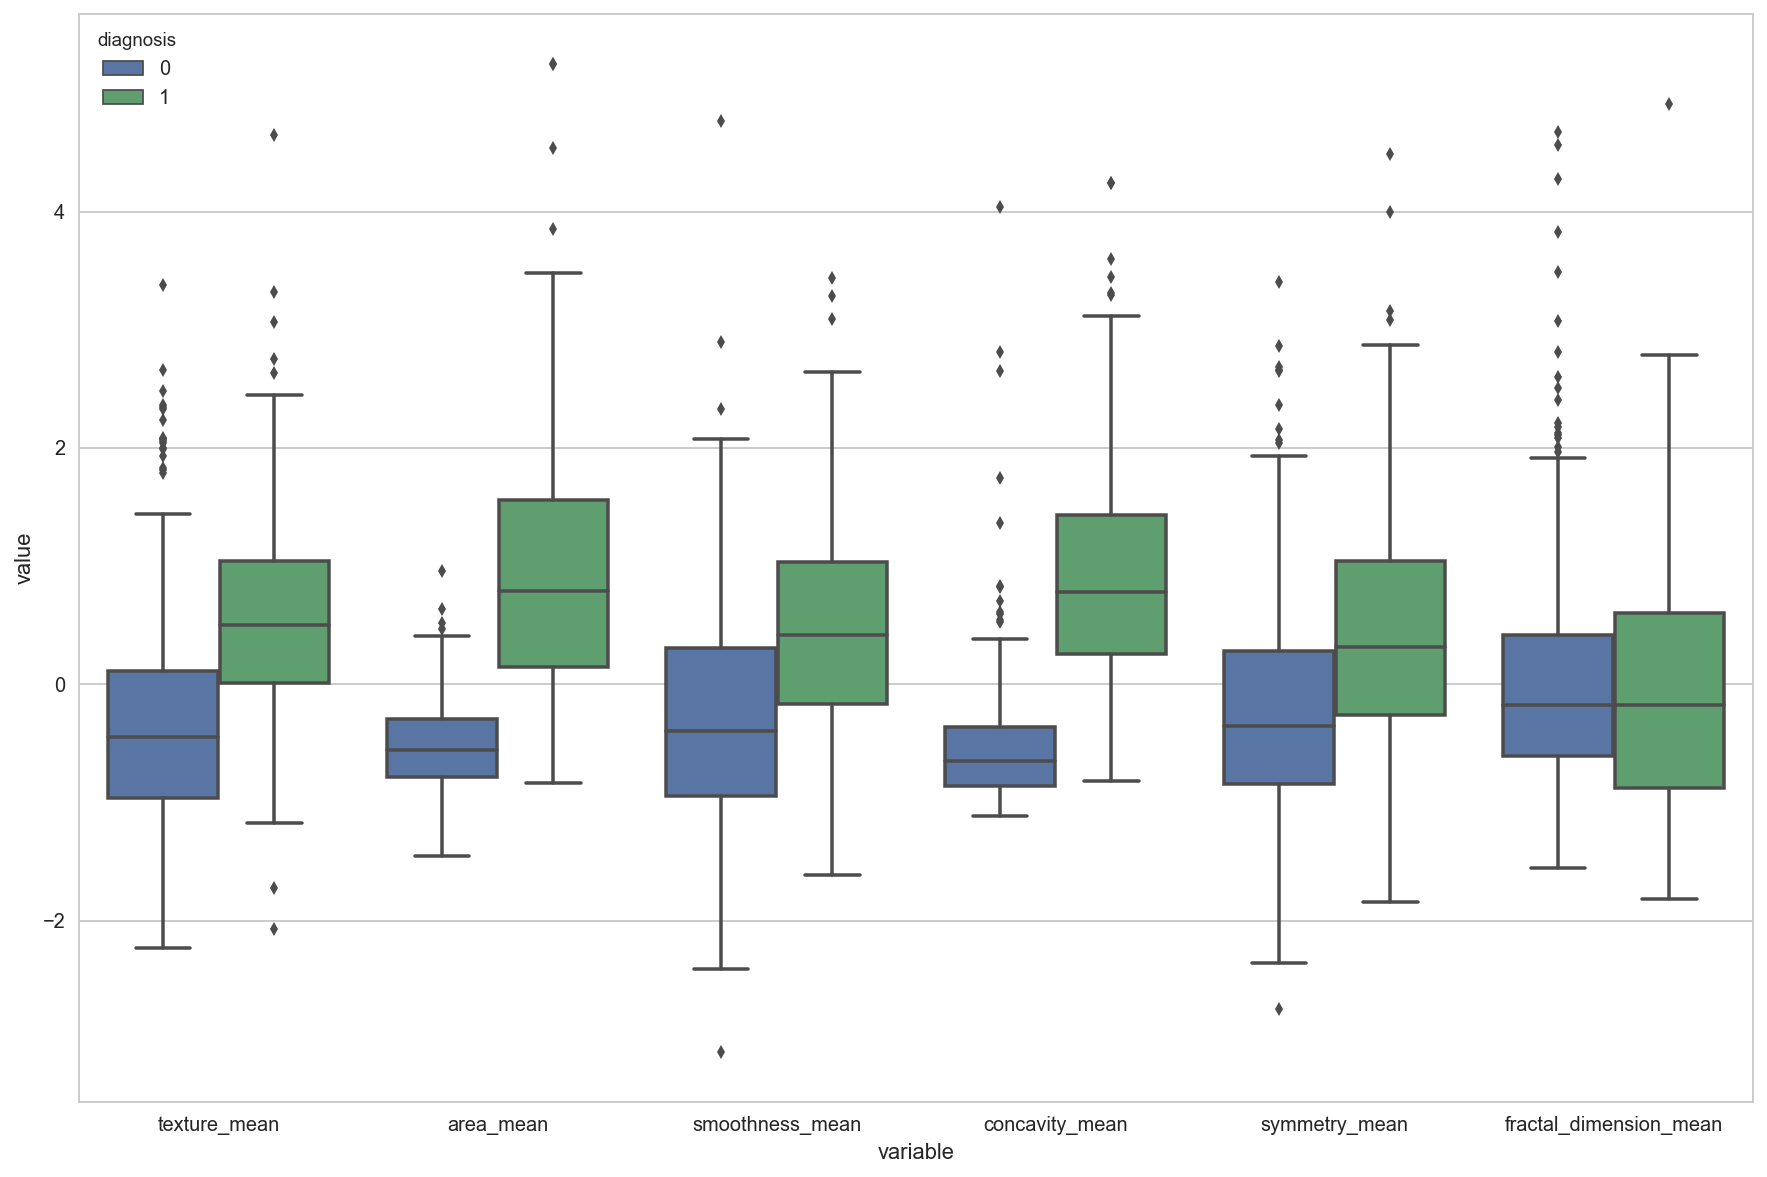

In [26]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [27]:
#Основной массив наблюдений четко разделен количественно по диагнозам B и М для следующих признаков - area_mean и concavity_mean 

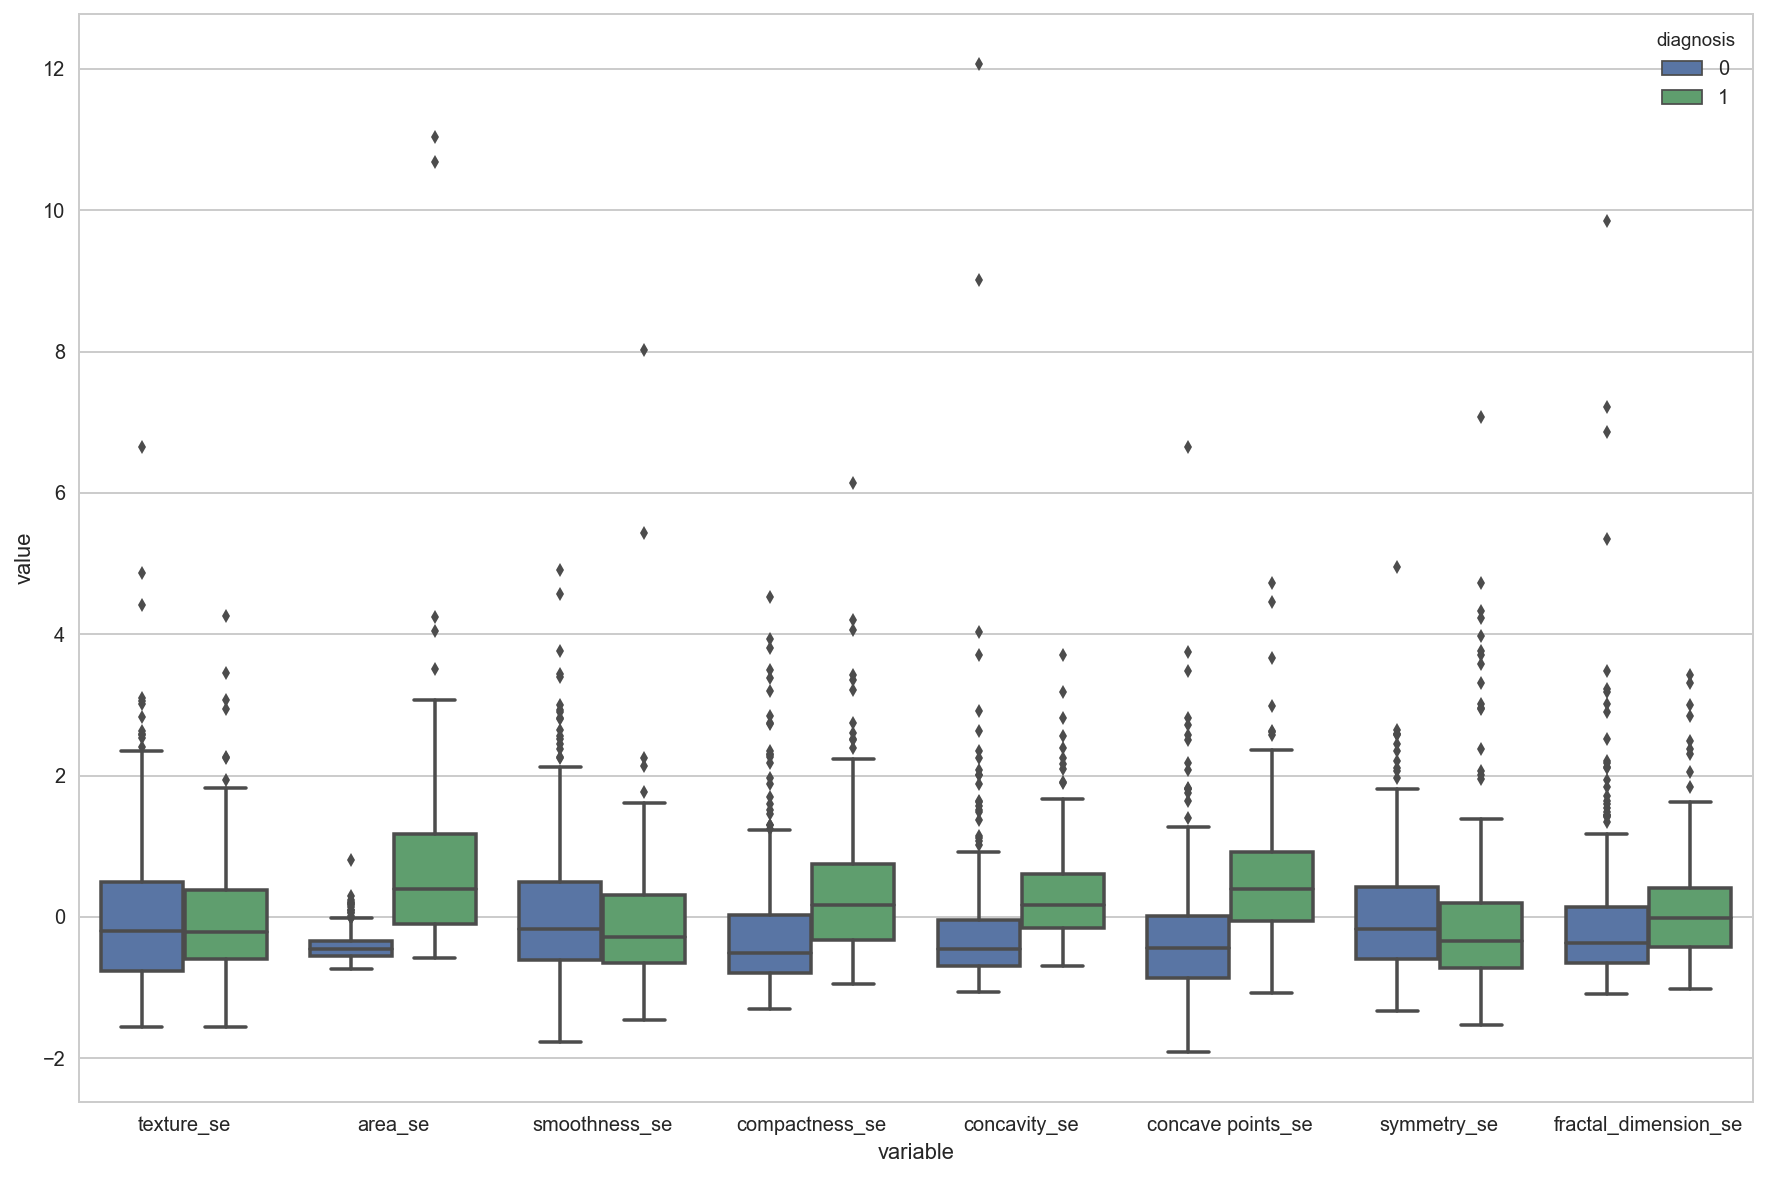

In [28]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['texture_se','area_se','smoothness_se','compactness_se','concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [29]:
#Основной массив наблюдений четко разделен количественно по диагнозам B и М по признаку - area_se 

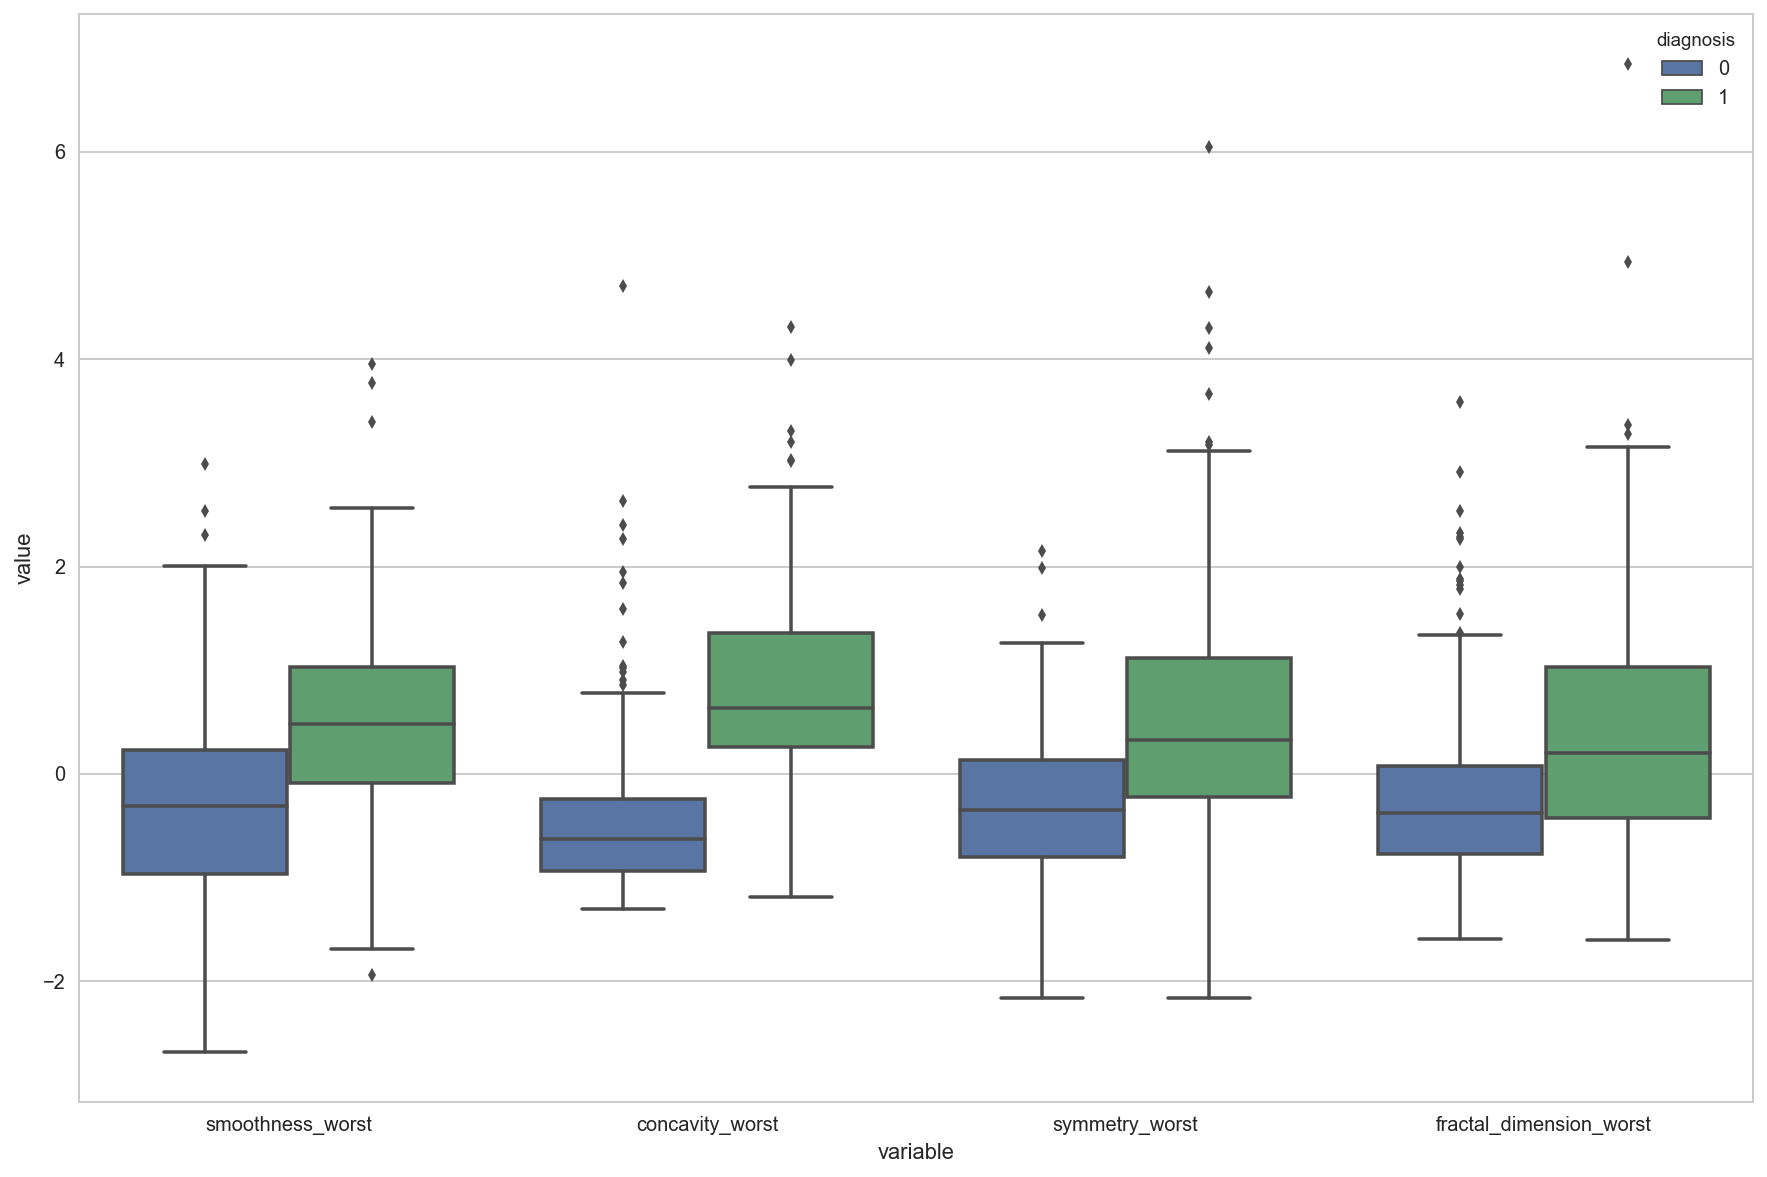

In [30]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [31]:
#Основной массив наблюдений четко разделен количественно по диагнозам B и М по признаку - concavity_worst

In [32]:
stats.ttest_ind(data['fractal_dimension_mean'][data['diagnosis'] == 0], data['fractal_dimension_mean'][data['diagnosis'] == 1])

Ttest_indResult(statistic=0.3057111297858189, pvalue=0.759936803725633)

In [33]:
from sklearn import preprocessing
from scipy import stats
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,brier_score_loss, recall_score, precision_score

Feature ranking:
1. feature 2 (0.213674)
2. feature 16 (0.197399)
3. feature 4 (0.186808)
4. feature 8 (0.090219)
5. feature 1 (0.076233)
6. feature 15 (0.047697)
7. feature 11 (0.027645)
8. feature 14 (0.023605)
9. feature 3 (0.020878)
10. feature 13 (0.018970)
11. feature 0 (0.017705)
12. feature 6 (0.016949)
13. feature 10 (0.014821)
14. feature 18 (0.011882)
15. feature 17 (0.010654)
16. feature 7 (0.010235)
17. feature 12 (0.006564)
18. feature 5 (0.004260)
19. feature 9 (0.003802)


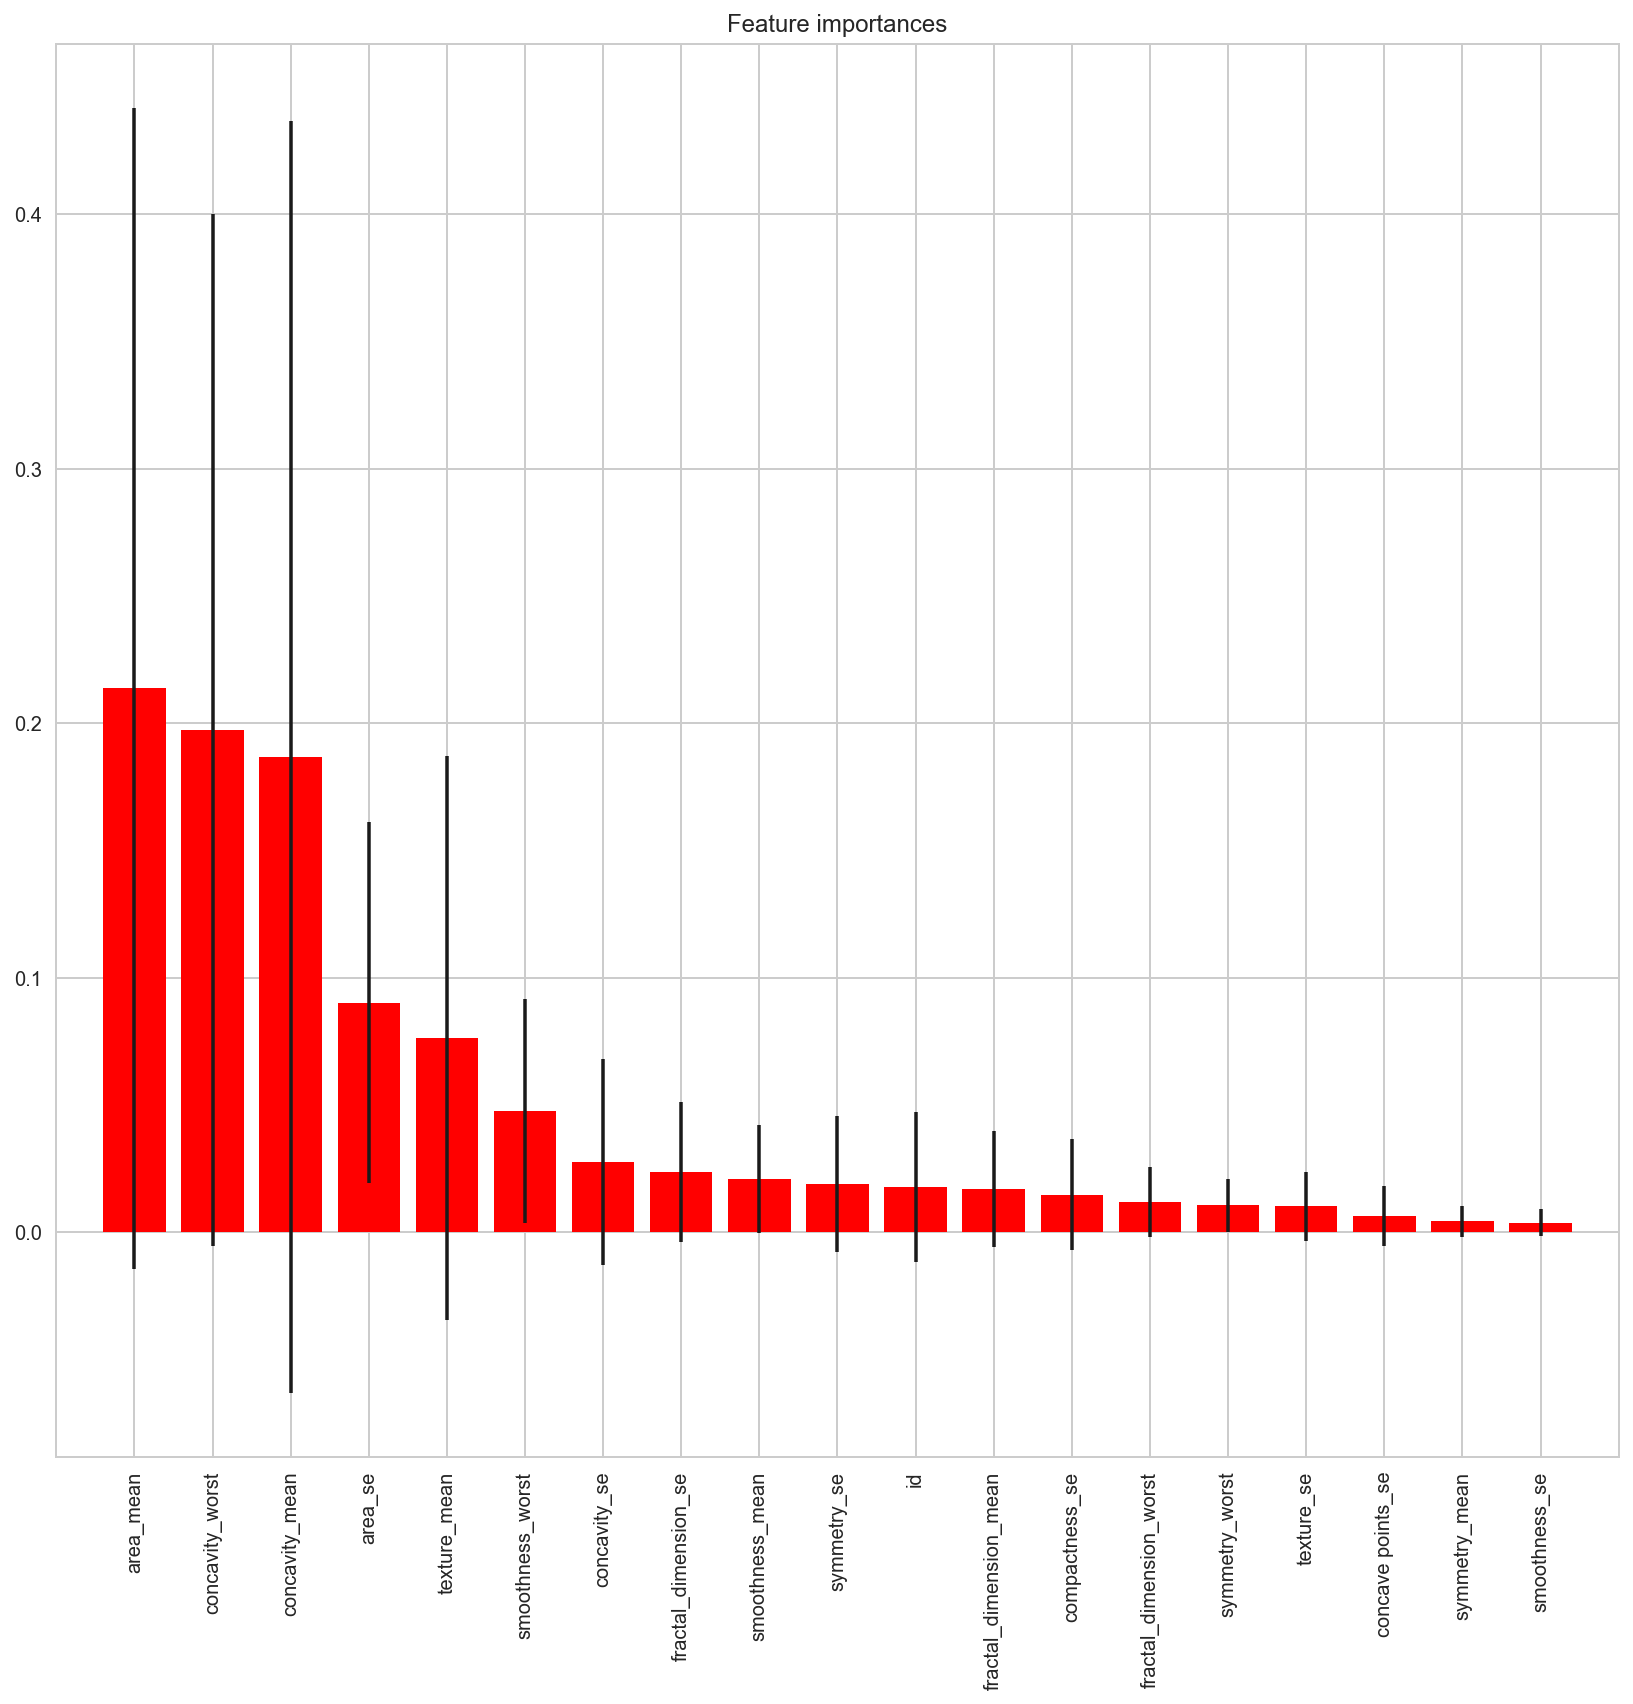

In [34]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="red", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [35]:
data=data.drop('diagnosis', axis=1)

In [36]:
log_regressor=LogisticRegression(random_state=20).fit(data,y)

In [37]:
lr_proba_predictions=log_regressor.predict_proba(data)

In [38]:
lr_proba_predictions[:,1]

array([9.99999376e-01, 9.99168577e-01, 9.99996450e-01, 9.97273017e-01,
       9.99811650e-01, 9.09041074e-01, 9.98892647e-01, 8.89849341e-01,
       9.93450831e-01, 9.99886374e-01, 7.53387833e-01, 9.85305147e-01,
       9.98816883e-01, 7.05671475e-01, 9.86356231e-01, 9.99746606e-01,
       9.48552157e-01, 9.99635231e-01, 9.99999359e-01, 1.11646398e-01,
       6.97939359e-03, 1.25908546e-04, 9.88283779e-01, 9.99995190e-01,
       9.99994881e-01, 9.99956013e-01, 9.97461484e-01, 9.99438525e-01,
       9.99860565e-01, 7.95991429e-01, 9.99999146e-01, 9.84480020e-01,
       9.99972153e-01, 9.99996273e-01, 9.97655125e-01, 9.99894388e-01,
       9.62481250e-01, 8.64218173e-04, 9.15540295e-01, 8.77940530e-01,
       9.12233388e-02, 7.36083196e-01, 9.99976604e-01, 8.71029152e-01,
       8.97236789e-01, 9.99989338e-01, 9.61650785e-05, 9.83734855e-01,
       3.36343859e-02, 1.62070821e-01, 3.06011317e-03, 2.35308047e-03,
       1.70909225e-03, 9.97993844e-01, 7.97362911e-01, 8.23750698e-03,
      

In [39]:
# Accuracy

In [40]:
lr_scoring_accuracy=cross_validation.cross_val_score(log_regressor, data, y, scoring='accuracy', cv=10)
'Log_accuracy mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring_accuracy.mean(), lr_scoring_accuracy.max(), lr_scoring_accuracy.min(), lr_scoring_accuracy.std())

'Log_accuracy mean:0.9789452078472041, max:1.0, min:0.9473684210526315, std:0.015367465572968137'

In [41]:
# F1-Score

In [42]:
lr_scoring_f1=cross_validation.cross_val_score(log_regressor, data, y, scoring='f1', cv=10)
'Log_f1 mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring_f1.mean(), lr_scoring_f1.max(), lr_scoring_f1.min(), lr_scoring_f1.std())

'Log_f1 mean:0.9706809107574849, max:1.0, min:0.923076923076923, std:0.022153906101063766'

In [43]:
# Precision

In [44]:
lr_scoring_precision=cross_validation.cross_val_score(log_regressor, data, y, scoring='precision', cv=10)
'Log_precision mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring_f1.mean(), lr_scoring_f1.max(), lr_scoring_f1.min(), lr_scoring_f1.std())

'Log_precision mean:0.9706809107574849, max:1.0, min:0.923076923076923, std:0.022153906101063766'

In [45]:
# Recall

In [46]:
lr_scoring_recall=cross_validation.cross_val_score(log_regressor, data, y, scoring='recall', cv=10)
'Log_recall mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring_recall.mean(), lr_scoring_recall.max(), lr_scoring_recall.min(), lr_scoring_recall.std())

'Log_recall mean:0.9525974025974027, max:1.0, min:0.8571428571428571, std:0.042596720685774775'

In [47]:
log_regressor=LogisticRegression(random_state=20).fit(X_train_scaled,y_train)
log_predict=log_regressor.predict(X_test_scaled)

In [48]:
l_a=accuracy_score(y_test,log_predict)

In [49]:
l_f1=f1_score(y_test,log_predict)

In [50]:
l_b=brier_score_loss(y_test,log_predict)

In [51]:

l_r=recall_score(y_test,log_predict)

In [52]:

l_p=precision_score(y_test,log_predict)

In [53]:
'Logistic regression accuracy:{}, f1 score:{}, recall:{}, precision:{}, brier score:{}'.format(l_a, l_f1, l_r, l_p, l_b)

'Logistic regression accuracy:0.9893617021276596, f1 score:0.9857142857142858, recall:0.971830985915493, precision:1.0, brier score:0.010638297872340425'

In [54]:
#Проверяем метод Наивный Байес

In [55]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

expected = y_train
predicted = model.predict(X_train)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.63      0.98      0.77       240
          1       0.43      0.02      0.04       141

avg / total       0.56      0.63      0.50       381

[[236   4]
 [138   3]]


In [56]:
model = GaussianNB()
model.fit(X_test, y_test)
print(model)

expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.62      0.98      0.76       117
          1       0.50      0.03      0.05        71

avg / total       0.58      0.62      0.50       188

[[115   2]
 [ 69   2]]


In [57]:
gnb_a=accuracy_score(y_test,predicted)
gnb_f1=f1_score(y_test,predicted)
gnb_b=brier_score_loss(y_test,predicted)
gnb_r=recall_score(y_test,predicted)
gnb_p=precision_score(y_test,predicted)
'GaussianNB accuracy:{}, f1 score:{}, recall:{}, precision:{}, brier score:{}'.format(gnb_a, gnb_f1, gnb_r, gnb_p, gnb_b)

'GaussianNB accuracy:0.6223404255319149, f1 score:0.05333333333333334, recall:0.028169014084507043, precision:0.5, brier score:0.3776595744680851'